##
    Mathematically selecting features to predict the price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [5]:
df.shape

(3554, 18)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang winter hills,sector 77,0.86,6408.0,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79
1,flat,pivotal devaan,sector 84,0.41,7033.0,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23
2,house,dlf city plots,sector 26,17.30,38737.0,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124
3,house,sector 38 rwa,sector 38,4.30,28782.0,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41
4,house,independent,sector 92,1.80,7627.0,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0


In [7]:
# dropping(temporary)  society and price_per_sqft(since it is higly corretaled with price and telling price_per_sqft means telling the price) columns because these will not be used in our predictive modelling
train_df = df.drop(columns=['society','price_per_sqft'])

In [8]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79
1,flat,sector 84,0.41,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23
2,house,sector 26,17.30,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124
3,house,sector 38,4.30,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41
4,house,sector 92,1.80,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0


<Axes: >

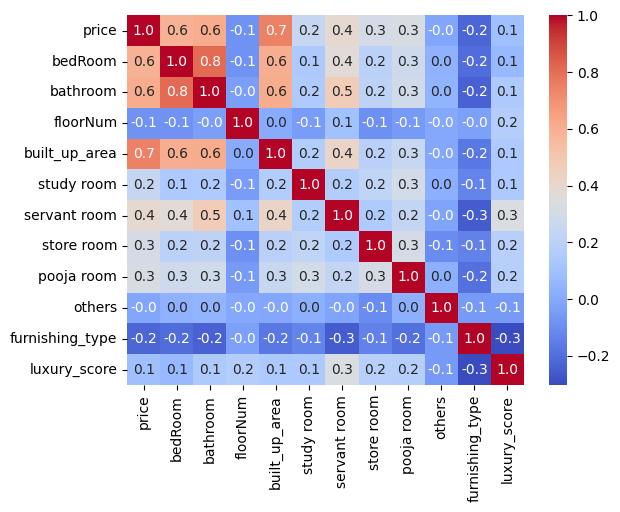

In [9]:
numeric_train_df = train_df.select_dtypes(include=['number'])
sns.heatmap(numeric_train_df.corr(),annot=True,fmt='.1f',cmap='coolwarm')

#
    Finding all the important features to know weather they are helpful in predicting the price  of house or not..


### luxury score

<Axes: >

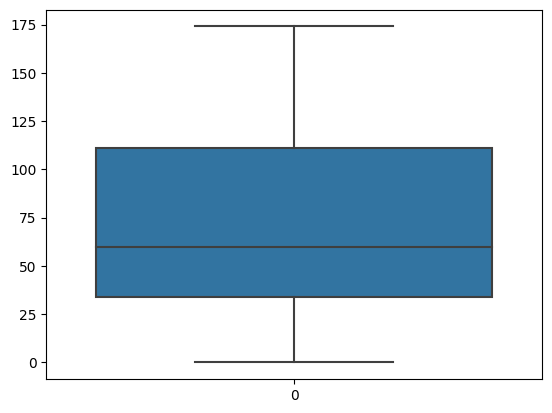

In [10]:
sns.boxplot(df['luxury_score'])

In [11]:
# Changing luxury score to categorical variable as it doesn't make any sense to ask a luxury score from a user.
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [12]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79,Medium
1,flat,sector 84,0.41,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23,Low
2,house,sector 26,17.30,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124,Medium
3,house,sector 38,4.30,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41,Low
4,house,sector 92,1.80,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0,Low


### floorNum
    Can ask the user if they want a flat in low-rise, medium-rise or high-rise floor, rather than asking a floor number

<Axes: >

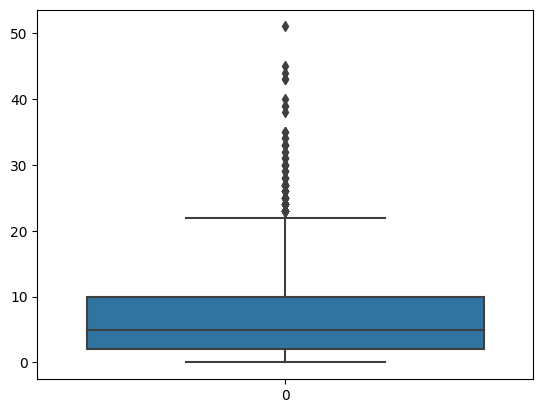

In [14]:
sns.boxplot(df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 77,0.86,2,2,2,16.0,New Property,1214.0,0,0,0,0,0,1,79,Medium,High Floor
1,flat,sector 84,0.41,2,2,2,10.0,New Property,565.0,0,0,0,0,0,1,23,Low,Mid Floor
2,house,sector 26,17.30,6,7,3+,3.0,New Property,4518.0,1,1,1,1,0,1,124,Medium,Mid Floor
3,house,sector 38,4.30,3,9,3+,3.0,Relatively New,1494.0,0,0,0,1,1,1,41,Low,Mid Floor
4,house,sector 92,1.80,4,5,0,13.0,Relatively New,2360.0,0,0,0,0,0,2,0,Low,High Floor


In [18]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [19]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 77,0.86,2,2,2,New Property,1214.0,0,0,0,0,0,1,Medium,High Floor
1,flat,sector 84,0.41,2,2,2,New Property,565.0,0,0,0,0,0,1,Low,Mid Floor
2,house,sector 26,17.30,6,7,3+,New Property,4518.0,1,1,1,1,0,1,Medium,Mid Floor
3,house,sector 38,4.30,3,9,3+,Relatively New,1494.0,0,0,0,1,1,1,Low,Mid Floor
4,house,sector 92,1.80,4,5,0,Relatively New,2360.0,0,0,0,0,0,2,Low,High Floor


In [20]:
# Converting any categorical column to ordinal column so that model can understand it. 
# Although we are doing ordinal encoding, this wont effect the model as long as we are using tree based models.
# If we want to use linear models, we need to use one hot encoding.

from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3',
       'sector 3 phase 2', 'sector 3 phase 3 extension', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 5

In [21]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,87.0,2,2,2.0,1.0,1214.00,0,0,0,0,0,1,2.0,0.0
1,0.0,96.0,2,2,2.0,1.0,565.00,0,0,0,0,0,1,1.0,2.0
2,1.0,31.0,6,7,4.0,1.0,4518.00,1,1,1,1,0,1,2.0,2.0
3,1.0,45.0,3,9,4.0,3.0,1494.00,0,0,0,1,1,1,1.0,2.0
4,1.0,105.0,4,5,0.0,3.0,2360.00,0,0,0,0,0,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,16.0,3,4,4.0,3.0,2225.56,0,1,0,0,0,1,0.0,0.0
3550,1.0,93.0,4,4,4.0,3.0,3240.00,1,1,0,1,0,1,1.0,1.0
3551,0.0,0.0,3,3,2.0,4.0,1303.00,0,0,0,0,0,2,1.0,2.0
3552,0.0,92.0,3,2,4.0,3.0,1319.00,0,0,0,0,0,2,0.0,2.0


In [22]:
y_label

0        0.86
1        0.41
2       17.30
3        4.30
4        1.80
        ...  
3549     3.65
3550     7.00
3551     1.30
3552     1.10
3553     1.10
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis
    Will use this technique to understand how strong is the linear relationship between two columns
    Will apply atleast 7-8 feature selection technique and assign a score to each of them by taking average or sum. Then finally selecting only those techniques which have good score 

<Axes: >

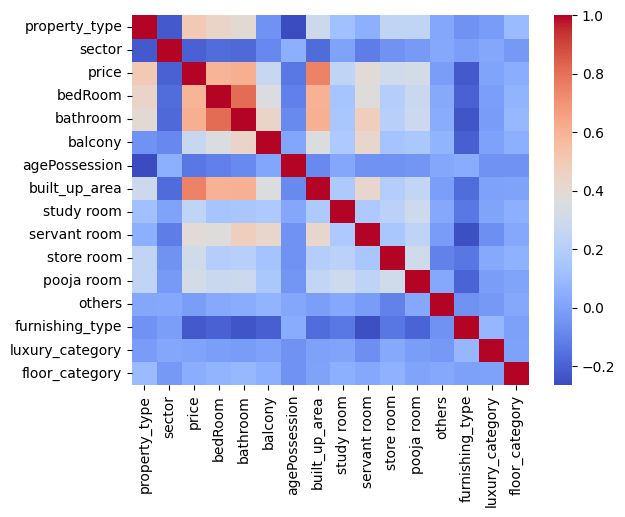

In [25]:
sns.heatmap(data_label_encoded.corr(),cmap='coolwarm')

In [27]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.201678
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.132989
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### Technique 2 - Random Forest Feature Importance
    The  random forest algorithm is a popular choice for feature selection 

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649485
1,sector,0.105557
0,property_type,0.101789
3,bathroom,0.025191
2,bedRoom,0.024782
8,servant room,0.018925
5,agePossession,0.014901
4,balcony,0.013208
12,furnishing_type,0.009770
9,store room,0.007239


### Technique 3 - Gradient Boosting Feature importances
    This also gives the feature importance just like random forest

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.682574
1,sector,0.101496
0,property_type,0.096169
2,bedRoom,0.038043
3,bathroom,0.035740
8,servant room,0.021963
9,store room,0.009534
5,agePossession,0.005126
7,study room,0.003807
12,furnishing_type,0.002725


### Technique 4 - Permutation Importance
    In this technique, we train a model using the available features and assign a score to it. Then we jumble  each feature in the dataset one by one and calculate the scores again. If the difference between the scores due to jumbled feature is high that mean the column plays an important role in predicting the target variable, if the score difference is small that mean that particular column is not that important in predicting the target variable
    

In [31]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4
# the negative value means , when values are jumbled the score increased

,feature,permutation_importance
6,built_up_area,0.704454
1,sector,0.160899
0,property_type,0.153029
3,bathroom,0.016464
8,servant room,0.007544
2,bedRoom,0.004159
13,luxury_category,0.001961
9,store room,0.001873
5,agePossession,0.001545
14,floor_category,0.001346


### Technique 5 - LASSO (A linear model)
    

In [33]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5
# Sector is although a useful column but since we changed it into a ordinal column, it is not giving any importance in lasso regression

,feature,lasso_coeff
6,built_up_area,1.511419
0,property_type,0.717537
3,bathroom,0.275896
9,store room,0.198827
7,study room,0.171423
8,servant room,0.161795
10,pooja room,0.073565
13,luxury_category,0.054817
2,bedRoom,0.013954
5,agePossession,-0.000000


### Technique 6 - RFE (Recurrsuve  Feature Elimination) - One of the best
    It works by recursively removing features one by one then training the modele 

In [34]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.651943
1,sector,0.102350
0,property_type,0.099749
2,bedRoom,0.025322
3,bathroom,0.023956
8,servant room,0.020064
5,agePossession,0.014009
4,balcony,0.012524
7,study room,0.010317
12,furnishing_type,0.009963


### Technique 7 - Linear Regression Weights (Linear model)
    

In [37]:
# Train a linear regression model on the label-encoded and standardized training data
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.513955
0,property_type,0.717742
3,bathroom,0.282475
9,store room,0.203237
7,study room,0.179404
8,servant room,0.171041
10,pooja room,0.076573
13,luxury_category,0.066272
2,bedRoom,0.016723
5,agePossession,0.001680


### Technique 8 - SHAP (Explainable AI)


In [38]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/ec/70/9d97e9a2bc8cccc4d3179f9378cf0bedae76a36c05ba7df844f44afc24f4/shap-0.45.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 453.1/453.1 kB 7.0 MB/s eta 0:00:00
Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


c:\Users\User\anaconda3\envs\Research_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[-1.60366976e-01, -2.26790309e-01, -4.35644405e-02, ...,
         3.47400660e-03,  1.13710149e-03,  2.71032386e-02],
       [-1.92449041e-01, -2.92233397e-01, -4.81082794e-02, ...,
         7.40783165e-03, -3.98435986e-03, -3.73596856e-03],
       [ 2.17399408e+00,  2.16012115e+00,  8.52852760e-01, ...,
         1.19964951e-01,  1.93829908e-02,  1.73194929e-02],
       ...,
       [-2.17280240e-01, -2.26707283e-01, -2.04992076e-02, ...,
        -1.24879088e-02, -5.22705238e-03, -2.38455113e-02],
       [-1.84205124e-01, -1.81791728e-01,  1.57692188e-03, ...,
        -1.46457590e-02,  1.51251168e-02, -5.90995715e-03],
       [-1.76809388e-01, -1.71318834e-01, -4.54040412e-02, ...,
         1.18640890e-02,  4.26736763e-03, -3.97757275e-03]])

In [40]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.247401
0,property_type,0.475508
1,sector,0.389321
3,bathroom,0.119296
8,servant room,0.090315
2,bedRoom,0.052803
4,balcony,0.042684
12,furnishing_type,0.028612
5,agePossession,0.026711
14,floor_category,0.025087


In [41]:
# Merging all the feature importance dataframes
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [42]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.201678,0.105557,0.101496,0.160899,-0.056055,0.102350,-0.065068,0.389321
bedRoom,0.591289,0.024782,0.038043,0.004159,0.013954,0.025322,0.016723,0.052803
bathroom,0.609777,0.025191,0.035740,0.016464,0.275896,0.023956,0.282475,0.119296
balcony,0.269637,0.013208,0.001872,-0.001243,-0.042518,0.012524,-0.065266,0.042684
agePossession,-0.132989,0.014901,0.005126,0.001545,-0.000000,0.014009,0.001680,0.026711
built_up_area,0.748574,0.649485,0.682574,0.704454,1.511419,0.651943,1.513955,1.247401
study room,0.242955,0.006984,0.003807,-0.000236,0.171423,0.010317,0.179404,0.019170
servant room,0.391930,0.018925,0.021963,0.007544,0.161795,0.020064,0.171041,0.090315
store room,0.305677,0.007239,0.009534,0.001873,0.198827,0.008018,0.203237,0.014062


In [43]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [44]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.720667
sector             0.142694
bathroom           0.034022
bedRoom            0.025568
servant room       0.023903
agePossession      0.010476
balcony            0.009942
store room         0.007277
study room         0.006472
floor_category     0.005698
luxury_category    0.005149
furnishing_type    0.003701
pooja room         0.002394
others             0.002037
dtype: float64

In [45]:
# Since these 3 columns were at the last in most of the techniques so dropping drop pooja room, study room, others
# But to prove our decision of dropping these columns, we will run random forest on the whole data and then drop these columns and run random forest again and compare the results(R2 scores).
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,87.0,2,2,2.0,1.0,1214.00,0,0,0,0,0,1,2.0,0.0
1,0.0,96.0,2,2,2.0,1.0,565.00,0,0,0,0,0,1,1.0,2.0
2,1.0,31.0,6,7,4.0,1.0,4518.00,1,1,1,1,0,1,2.0,2.0
3,1.0,45.0,3,9,4.0,3.0,1494.00,0,0,0,1,1,1,1.0,2.0
4,1.0,105.0,4,5,0.0,3.0,2360.00,0,0,0,0,0,2,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,16.0,3,4,4.0,3.0,2225.56,0,1,0,0,0,1,0.0,0.0
3550,1.0,93.0,4,4,4.0,3.0,3240.00,1,1,0,1,0,1,1.0,1.0
3551,0.0,0.0,3,3,2.0,4.0,1303.00,0,0,0,0,0,2,1.0,2.0
3552,0.0,92.0,3,2,4.0,3.0,1319.00,0,0,0,0,0,2,0.0,2.0


In [46]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [47]:
scores.mean()

0.8166780167769222

In [48]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [49]:
scores.mean()

0.8126236017673769

##
    Not much difference by drooping these 3 columns

In [50]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [51]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [52]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,87.0,2,2,2.0,1.0,1214.00,0,0,1,2.0,0.0,0.86
1,0.0,96.0,2,2,2.0,1.0,565.00,0,0,1,1.0,2.0,0.41
2,1.0,31.0,6,7,4.0,1.0,4518.00,1,1,1,2.0,2.0,17.30
3,1.0,45.0,3,9,4.0,3.0,1494.00,0,0,1,1.0,2.0,4.30
4,1.0,105.0,4,5,0.0,3.0,2360.00,0,0,2,1.0,0.0,1.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0.0,16.0,3,4,4.0,3.0,2225.56,1,0,1,0.0,0.0,3.65
3550,1.0,93.0,4,4,4.0,3.0,3240.00,1,0,1,1.0,1.0,7.00
3551,0.0,0.0,3,3,2.0,4.0,1303.00,0,0,2,1.0,2.0,1.30
3552,0.0,92.0,3,2,4.0,3.0,1319.00,0,0,2,0.0,2.0,1.10
